<a href="https://colab.research.google.com/github/allielabrecque4-debug/MLE-Final-Project/blob/main/Wind_Turbine_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Machine Learning Project: Wind Turbine Energy Prediction <br> Allie Labrecque <br> 662017931 <br>


In [4]:
# load Wind Turbine Scada dataset from kaggle
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split

drive.mount('/content/drive')

csv_path = '/content/drive/MyDrive/WindProps.csv'
df = pd.read_csv(csv_path)

# Separate features (wind speed, wind direction, theoretical power) from target (active power)
X = df[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y = df['LV ActivePower (kW)']
timestamps = df['Date/Time']

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test, timestamps_train, timestamps_test = train_test_split(
    X, y, timestamps, test_size=0.3, random_state=42)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Method 1: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R-squared (R2): {r2_rf}")

Mean Squared Error (MSE): 166188.39846485044
R-squared (R2): 0.9034310766514667


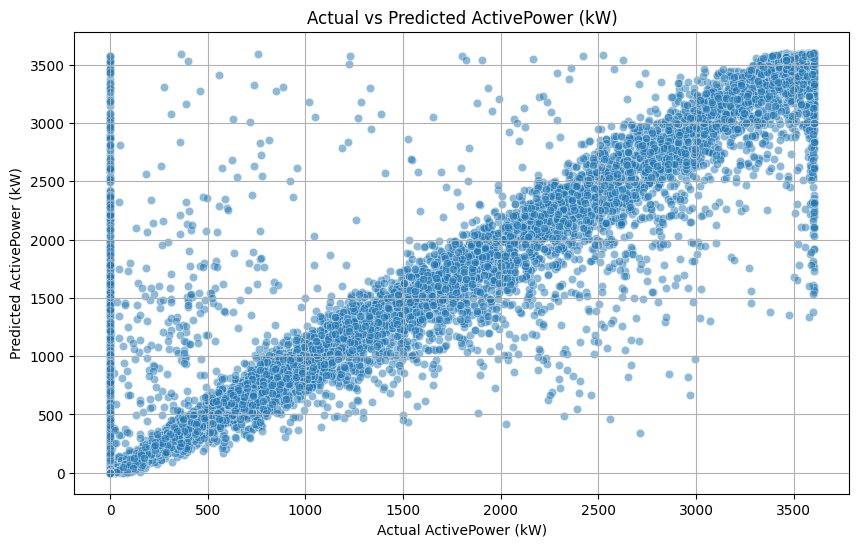

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.title('Actual vs Predicted ActivePower (kW)')
plt.xlabel('Actual ActivePower (kW)')
plt.ylabel('Predicted ActivePower (kW)')
plt.grid(True)
plt.show()

The data points where the active power is zero when the wind speed is high are causing accuracy problems. These data points represent times when the turbine was turned off for maintenance or safety reasons, so it is reasonable to remove them from the data set to more accuractely capture the relationship between active power and the input features. Based on the graph below (Active Power vs. Wind Speed) a cut-off value of about 2 m/s should be implemented.

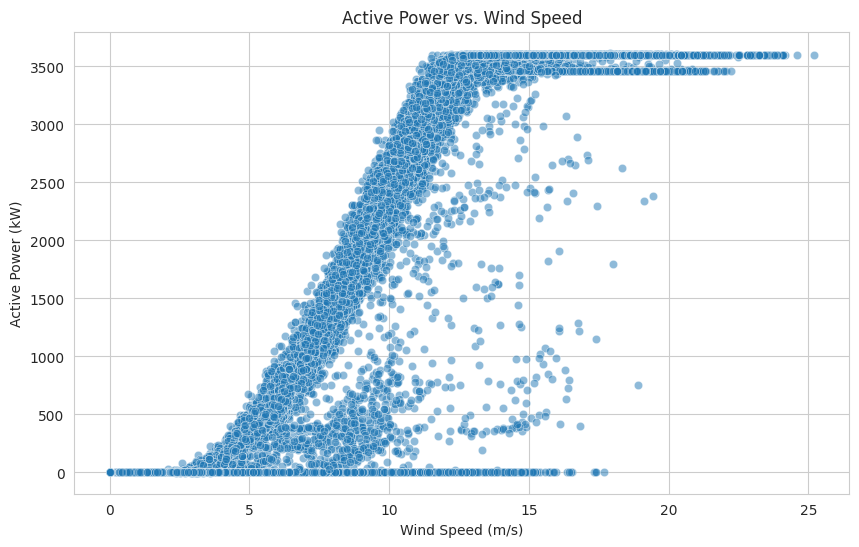

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create scatter plot for Active Power vs. Wind Speed
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Wind Speed (m/s)'], y=df['LV ActivePower (kW)'], alpha=0.5)
plt.title('Active Power vs. Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Active Power (kW)')
plt.show()

# Data filtering

In [4]:
# filter out data points where active power is zero at high wind speeds (times when the turbine is off for maintenance or safety)
filtered_df = df[(df['LV ActivePower (kW)'] > 0) | (df['Wind Speed (m/s)'] <= 2)]

# Separate features (wind speed, wind direction, theoretical power) from target (active power)
X_f = filtered_df[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y_f = filtered_df['LV ActivePower (kW)']
timestamps_f = filtered_df['Date/Time']

# Split the data into training and testing sets (70-30 split)
X_train_f, X_test_f, y_train_f, y_test_f, timestamps_train_f, timestamps_test_f = train_test_split(
    X_f, y_f, timestamps_f, test_size=0.3, random_state=42)



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train_f, y_train_f)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_f = rf_model.predict(X_test_f)

# Evaluate the model
mse = mean_squared_error(y_test_f, y_pred_f)
r2 = r2_score(y_test_f, y_pred_f)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 63418.83144673654
R-squared (R2): 0.9626203871921324


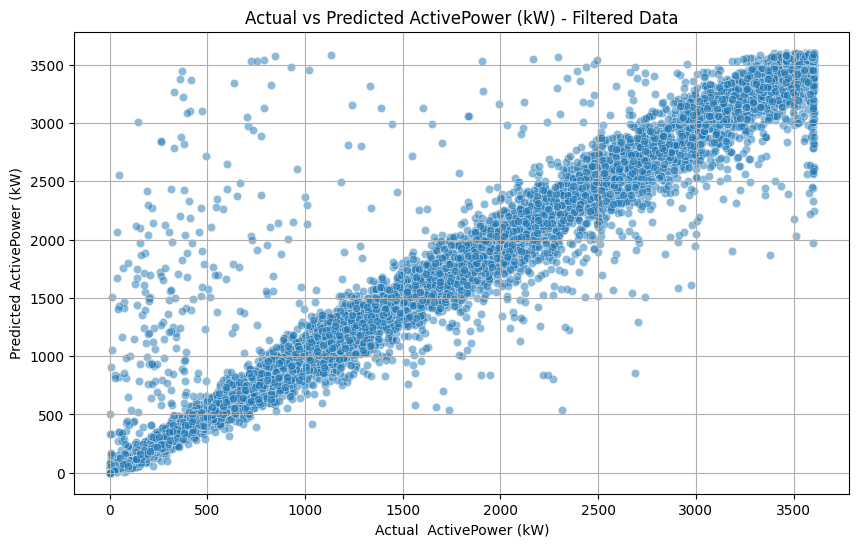

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_f, y=y_pred_f, alpha=0.5)
plt.title('Actual vs Predicted ActivePower (kW) - Filtered Data')
plt.xlabel('Actual  ActivePower (kW)')
plt.ylabel('Predicted ActivePower (kW)')
plt.grid(True)
plt.show()

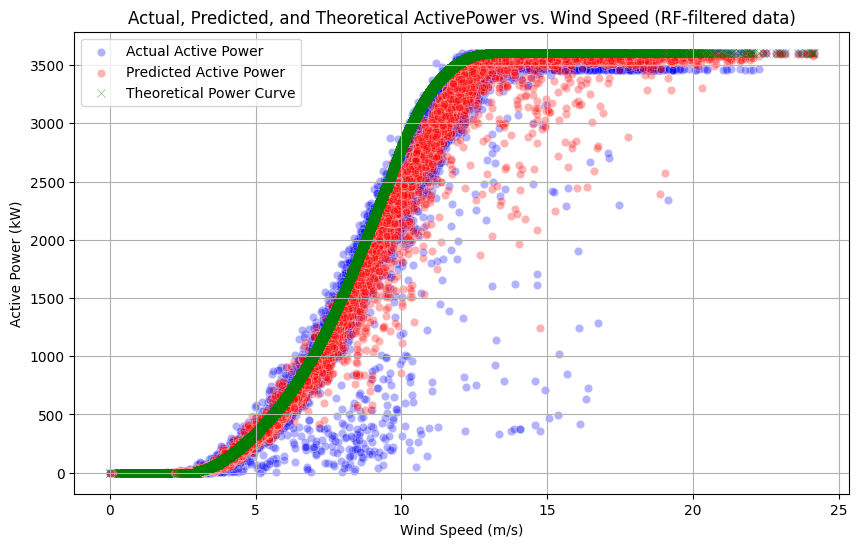

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for plotting from the test set of filtered data
plot_df = pd.DataFrame({
    'Wind Speed (m/s)': X_test_f['Wind Speed (m/s)'],
    'Actual ActivePower (kW)': y_test_f,
    'Predicted ActivePower (kW)': y_pred_f,
    'Theoretical_Power_Curve (KWh)': X_test_f['Theoretical_Power_Curve (KWh)']
})

plt.figure(figsize=(10, 6))

# Plot Actual Active Power
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Actual ActivePower (kW)',
    data=plot_df,
    alpha=0.3,
    label='Actual Active Power',
    color='blue'
)

# Plot Predicted Active Power
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Predicted ActivePower (kW)',
    data=plot_df,
    alpha=0.3,
    label='Predicted Active Power',
    color='red'
)

# Plot Theoretical Power Curve
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Theoretical_Power_Curve (KWh)',
    data=plot_df,
    alpha=0.5,
    label='Theoretical Power Curve',
    color='green',
    marker='x' # Use a different marker for theoretical data
)

plt.title('Actual, Predicted, and Theoretical ActivePower vs. Wind Speed (RF-filtered data)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Active Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

Using the filtered data in the RF Regression, the R-squared value improved from 0.90 to 0.96 and the MSE improved from 166,188 to 63,418 which correlates to a value of about 250 kW error. However, the model is not perfect and has a tendancy to overpredict power generation at low wind speeds. This will be improved with parameter hypertuning

# Method 2: Support Vector Regressor (SVR) using the filtered data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Scale the features (X_train_f and X_test_f)
X_train_scaled = scaler_X.fit_transform(X_train_f) # use filtered data
X_test_scaled = scaler_X.transform(X_test_f)

# SVR also often benefits from scaling the target variable (y)
y_train_scaled = scaler_y.fit_transform(y_train_f.values.reshape(-1, 1)).ravel()
# Note: y_test_f is scaled for prediction evaluation but not for training

print("Features and target scaled successfully.")

# Initialize the SVR model
# C and epsilon are important hyperparameters to tune for SVR.
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma='scale')

# Train the model on the scaled training data
print("Training SVR model...")
svr_model.fit(X_train_scaled, y_train_scaled)
print("SVR model training finished.")

Features and target scaled successfully.
Training SVR model...
SVR model training finished.


In [ ]:
# Make predictions on the scaled test set
y_pred_scaled_svr = svr_model.predict(X_test_scaled)

# Inverse transform the predictions to the original scale
y_pred_svr = scaler_y.inverse_transform(y_pred_scaled_svr.reshape(-1, 1)).ravel()

# Evaluate the model
mse_svr = mean_squared_error(y_test_f, y_pred_svr)
r2_svr = r2_score(y_test_f, y_pred_svr)

print(f"Mean Squared Error (MSE) for SVR: {mse_svr}")
print(f"R-squared (R2) for SVR: {r2_svr}")

Mean Squared Error (MSE) for SVR: 63173.3600081003
R-squared (R2) for SVR: 0.9627650702006694


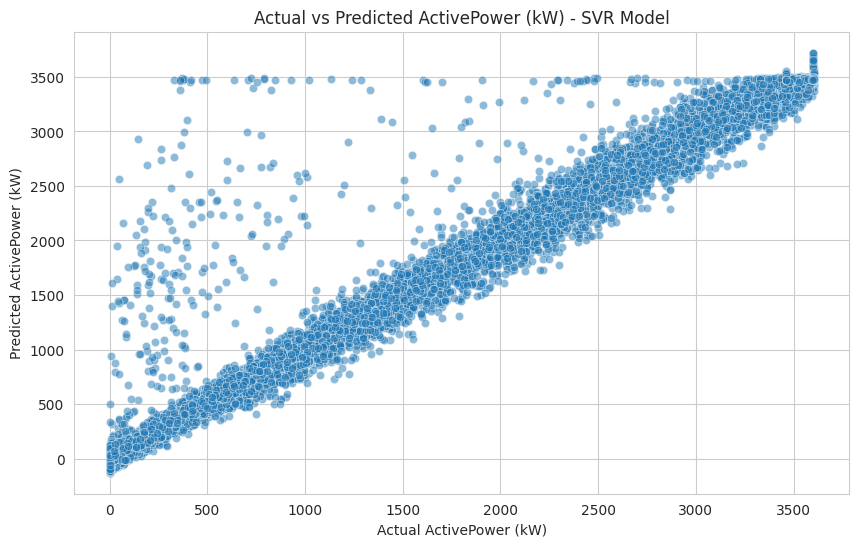

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize predicted vs actual values for the SVR model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_f, y=y_pred_svr, alpha=0.5)
plt.title('Actual vs Predicted ActivePower (kW) - SVR Model')
plt.xlabel('Actual ActivePower (kW)')
plt.ylabel('Predicted ActivePower (kW)')
plt.grid(True)
plt.show()

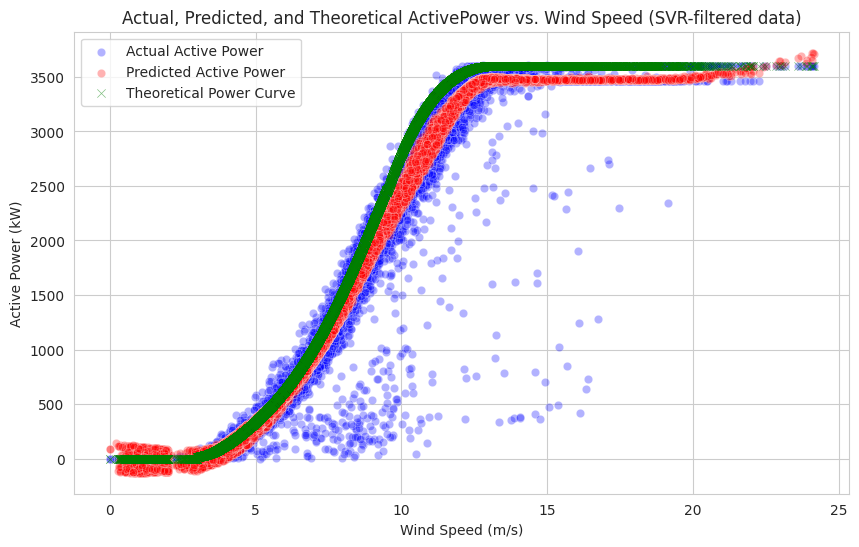

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for plotting from the test set of filtered data
plot_df = pd.DataFrame({
    'Wind Speed (m/s)': X_test_f['Wind Speed (m/s)'],
    'Actual ActivePower (kW)': y_test_f,
    'Predicted ActivePower (kW)': y_pred_svr,
    'Theoretical_Power_Curve (KWh)': X_test_f['Theoretical_Power_Curve (KWh)']
})

plt.figure(figsize=(10, 6))

# Plot Actual Active Power
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Actual ActivePower (kW)',
    data=plot_df,
    alpha=0.3,
    label='Actual Active Power',
    color='blue'
)

# Plot Predicted Active Power
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Predicted ActivePower (kW)',
    data=plot_df,
    alpha=0.3,
    label='Predicted Active Power',
    color='red'
)

# Plot Theoretical Power Curve
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Theoretical_Power_Curve (KWh)',
    data=plot_df,
    alpha=0.5,
    label='Theoretical Power Curve',
    color='green',
    marker='x' # Use a different marker for theoretical data
)

plt.title('Actual, Predicted, and Theoretical ActivePower vs. Wind Speed (SVR-filtered data)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Active Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

The RF and SVR models have the same R-Squared value of 0.963 and no meaningful difference between the values of MSE. The SVR has the same problem as RF, struggling with the data points at low wind speeds. The RF will be tuned later in the code.

# Method 3: RNN with LSTM using the filtered data


In [ ]:
filtered_df_sorted = filtered_df.copy()
filtered_df_sorted['Date/Time'] = pd.to_datetime(filtered_df_sorted['Date/Time'], format='%d %m %Y %H:%M')
filtered_df_sorted = filtered_df_sorted.sort_values(by='Date/Time').reset_index(drop=True)
print("DataFrame sorted by Date/Time successfully.")

DataFrame sorted by Date/Time successfully.


In [ ]:
from sklearn.preprocessing import StandardScaler

# Separate features and target
X_sorted = filtered_df_sorted[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y_sorted = filtered_df_sorted['LV ActivePower (kW)']

# Split the data into training and testing sets (70-30 split sequentially)
train_size = int(len(filtered_df_sorted) * 0.7)

X_train_rnn, X_test_rnn = X_sorted[0:train_size], X_sorted[train_size:len(filtered_df_sorted)]
y_train_rnn, y_test_rnn = y_sorted[0:train_size], y_sorted[train_size:len(filtered_df_sorted)]

print(f"Training set size: {len(X_train_rnn)} samples")
print(f"Testing set size: {len(X_test_rnn)} samples")

# Initialize separate StandardScalers for features and target
scaler_X_rnn = StandardScaler()
scaler_y_rnn = StandardScaler()

# Fit and transform training features
X_train_scaled = scaler_X_rnn.fit_transform(X_train_rnn)
# Transform testing features using the fitted scaler
X_test_scaled = scaler_X_rnn.transform(X_test_rnn)

# Fit and transform training target (reshaping to 2D first)
y_train_scaled = scaler_y_rnn.fit_transform(y_train_rnn.values.reshape(-1, 1)).ravel()
# Transform testing target using the fitted scaler
y_test_scaled = scaler_y_rnn.transform(y_test_rnn.values.reshape(-1, 1)).ravel()

print("Features and target scaled and split successfully for RNN.")

Training set size: 30298 samples
Testing set size: 12986 samples
Features and target scaled and split successfully for RNN.


In [ ]:
import numpy as np

# Define the look_back window
look_back = 24 # 24 time steps for 4 hours of data (10-minute intervals)

# Function to create time-series sequences
def create_rnn_sequences(X_data, y_data, look_back):
    X_seq, y_seq = [], []
    for i in range(len(X_data) - look_back):
        X_seq.append(X_data[i:(i + look_back)])
        y_seq.append(y_data[i + look_back])
    return np.array(X_seq), np.array(y_seq)

# Create sequences for training data
X_train_rnn_seq, y_train_rnn_seq = create_rnn_sequences(X_train_scaled, y_train_scaled, look_back)
print(f"X_train_rnn_seq shape: {X_train_rnn_seq.shape}")
print(f"y_train_rnn_seq shape: {y_train_rnn_seq.shape}")

# Create sequences for testing data
X_test_rnn_seq, y_test_rnn_seq = create_rnn_sequences(X_test_scaled, y_test_scaled, look_back)
print(f"X_test_rnn_seq shape: {X_test_rnn_seq.shape}")
print(f"y_test_rnn_seq shape: {y_test_rnn_seq.shape}")

print("Time-series sequences created successfully for RNN.")

X_train_rnn_seq shape: (30274, 24, 3)
y_train_rnn_seq shape: (30274,)
X_test_rnn_seq shape: (12962, 24, 3)
y_test_rnn_seq shape: (12962,)
Time-series sequences created successfully for RNN.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Get the number of features from X_train_rnn_seq
num_features = X_train_rnn_seq.shape[2]

# Initialize the Sequential model
rnn_model = Sequential()

# Add an Input layer explicitly
rnn_model.add(Input(shape=(look_back, num_features)))

# Add an LSTM layer
# return_sequences=False because we are predicting a single value output (not another sequence)
rnn_model.add(LSTM(units=50, activation='relu'))

# Add a Dense output layer
rnn_model.add(Dense(units=1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

print("RNN model defined and compiled successfully.")
rnn_model.summary()

RNN model defined and compiled successfully.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = rnn_model.fit(
    X_train_rnn_seq,
    y_train_rnn_seq,
    epochs=100,
    batch_size=128,
    validation_data=(X_test_rnn_seq, y_test_rnn_seq),
    verbose=1
)
print("RNN model training complete.")

Epoch 1/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 0.2728 - mean_absolute_error: 0.3707 - val_loss: 0.0988 - val_mean_absolute_error: 0.2226
Epoch 2/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0737 - mean_absolute_error: 0.1718 - val_loss: 0.0918 - val_mean_absolute_error: 0.2010
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0711 - mean_absolute_error: 0.1652 - val_loss: 0.2208 - val_mean_absolute_error: 0.2507
Epoch 4/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0727 - mean_absolute_error: 0.1631 - val_loss: 0.1201 - val_mean_absolute_error: 0.2130
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0649 - mean_absolute_error: 0.1569 - val_loss: 0.0959 - val_mean_absolute_error: 0.2197
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0705 - mean_absolute_error: 0.1604 - val_loss: 0.0836 - val_mean_absolute_error: 0.1861
Epoch 7/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0687 - mean_absolute_error: 0.

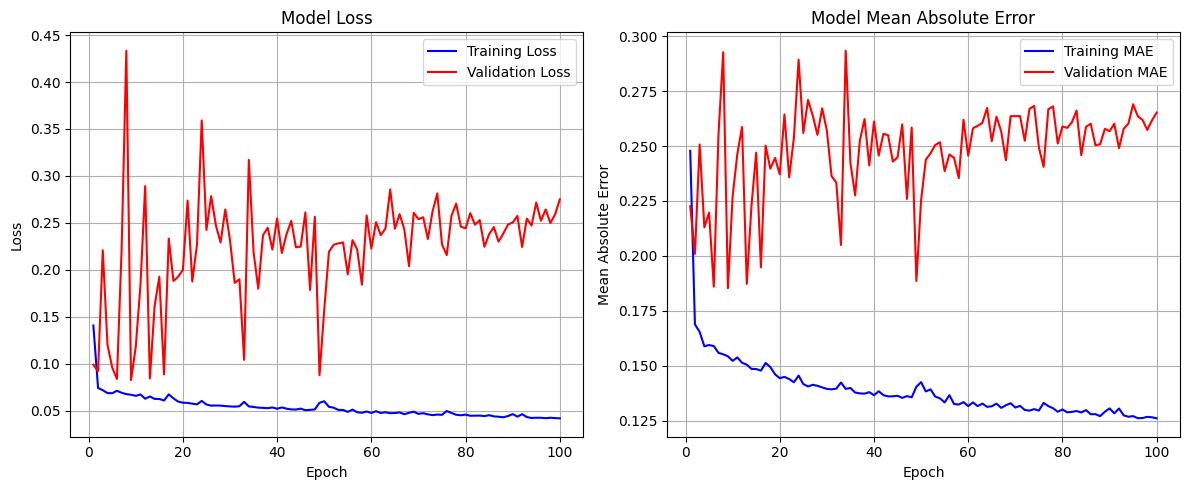

Training history plots displayed.


In [ ]:
import matplotlib.pyplot as plt

# Get training history from the 'history' object
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1) # 1 row, 2 columns, first subplot
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training and validation MAE
plt.subplot(1, 2, 2) # 1 row, 2 columns, second subplot
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.title('Model Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

print("Training history plots displayed.")

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the scaled test set
y_pred_scaled_rnn = rnn_model.predict(X_test_rnn_seq)

# Inverse transform the predictions to the original scale
y_pred_rnn = scaler_y_rnn.inverse_transform(y_pred_scaled_rnn).ravel()

# Inverse transform the actual test target values to the original scale
y_test_rnn_original = scaler_y_rnn.inverse_transform(y_test_rnn_seq.reshape(-1, 1)).ravel()

# Evaluate the model
mse_rnn = mean_squared_error(y_test_rnn_original, y_pred_rnn)
r2_rnn = r2_score(y_test_rnn_original, y_pred_rnn)

print(f"Mean Squared Error (MSE) for RNN: {mse_rnn}")
print(f"R-squared (R2) for RNN: {r2_rnn}")

406/406 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step
Mean Squared Error (MSE) for RNN: 457719.741947564
R-squared (R2) for RNN: 0.721589524917245


The model has a low R-squared value and high MSE due to overfitting. The model look back needs to be tuned. Dropout layers, EarlyStopping, and ReduceLROnPlateau callbacks will be implemented to address overfitting.

In [ ]:
import numpy as np

# Define a new look_back window
look_back = 36 # Experiment with a new value, e.g., 36 time steps for 6 hours of data (10-minute intervals)

# Function to create time-series sequences (re-using the previously defined function)
def create_rnn_sequences(X_data, y_data, look_back):
    X_seq, y_seq = [], []
    for i in range(len(X_data) - look_back):
        X_seq.append(X_data[i:(i + look_back)])
        y_seq.append(y_data[i + look_back])
    return np.array(X_seq), np.array(y_seq)

# Create sequences for training data with the new look_back
X_train_rnn_seq, y_train_rnn_seq = create_rnn_sequences(X_train_scaled, y_train_scaled, look_back)
print(f"New X_train_rnn_seq shape: {X_train_rnn_seq.shape}")
print(f"New y_train_rnn_seq shape: {y_train_rnn_seq.shape}")

# Create sequences for testing data with the new look_back
X_test_rnn_seq, y_test_rnn_seq = create_rnn_sequences(X_test_scaled, y_test_scaled, look_back)
print(f"New X_test_rnn_seq shape: {X_test_rnn_seq.shape}")
print(f"New y_test_rnn_seq shape: {y_test_rnn_seq.shape}")

print(f"Time-series sequences re-created successfully with look_back = {look_back}.")

New X_train_rnn_seq shape: (30262, 36, 3)
New y_train_rnn_seq shape: (30262,)
New X_test_rnn_seq shape: (12950, 36, 3)
New y_test_rnn_seq shape: (12950,)
Time-series sequences re-created successfully with look_back = 36.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input

# Get the number of features from X_train_rnn_seq
num_features = X_train_rnn_seq.shape[2]

# Initialize the Sequential model
rnn_model = Sequential()

# Add an Input layer explicitly with the updated look_back
rnn_model.add(Input(shape=(look_back, num_features)))

# Add an LSTM layer
# return_sequences=False because we are predicting a single value output (not another sequence)
rnn_model.add(LSTM(units=50, activation='relu'))

# Add a Dense output layer
rnn_model.add(Dense(units=1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

print("RNN model redefined and compiled successfully with updated input shape.")
rnn_model.summary()

RNN model redefined and compiled successfully with updated input shape.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 50)             │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Get the number of features from X_train_rnn_seq
num_features = X_train_rnn_seq.shape[2]

# Initialize the Sequential model
rnn_model = Sequential()

# Add an Input layer explicitly with the updated look_back
rnn_model.add(Input(shape=(look_back, num_features)))

# Add an LSTM layer with dropout for regularization
rnn_model.add(LSTM(units=50, activation='relu', return_sequences=True))
# Add a dropout layer after the first LSTM layer
rnn_model.add(Dropout(0.2))

# Add another LSTM layer (optional, but common for deeper models)
rnn_model.add(LSTM(units=50, activation='relu'))
# Add a dropout layer after the second LSTM layer
rnn_model.add(Dropout(0.2))

# Add a Dense output layer
rnn_model.add(Dense(units=1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

print("RNN model redefined with Dropout layers and compiled successfully.")
rnn_model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=10,        # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # Monitor validation loss
    factor=0.5,         # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=5,         # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.0001,      # Lower bound on the learning rate
    verbose=1
)

print("EarlyStopping and ReduceLROnPlateau callbacks defined.")

RNN model redefined with Dropout layers and compiled successfully.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 36, 50)         │        10,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)

EarlyStopping and ReduceLROnPlateau callbacks defined.


In [ ]:
history = rnn_model.fit(
    X_train_rnn_seq,
    y_train_rnn_seq,
    epochs=100,
    batch_size=128,
    validation_data=(X_test_rnn_seq, y_test_rnn_seq),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)
print("RNN model training complete with early stopping and learning rate reduction.")

Epoch 1/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 14s 27ms/step - loss: 0.2721 - mean_absolute_error: 0.3837 - val_loss: 0.1125 - val_mean_absolute_error: 0.2344 - learning_rate: 0.0010
Epoch 2/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1055 - mean_absolute_error: 0.2257 - val_loss: 0.1160 - val_mean_absolute_error: 0.2276 - learning_rate: 0.0010
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0970 - mean_absolute_error: 0.2115 - val_loss: 0.0895 - val_mean_absolute_error: 0.2019 - learning_rate: 0.0010
Epoch 4/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0905 - mean_absolute_error: 0.2026 - val_loss: 0.1906 - val_mean_absolute_error: 0.2603 - learning_rate: 0.0010
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0839 - mean_absolute_error: 0.1952 - val_loss: 0.1538 - val_mean_absolute_error: 0.2432 - learning_rate: 0.0010
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0815 - mean_absolute_error: 0.1916 - val_loss: 0.1866 -

405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
Mean Squared Error (MSE) for Tuned RNN: 138522.26513171569
R-squared (R2) for Tuned RNN: 0.9157068431052234


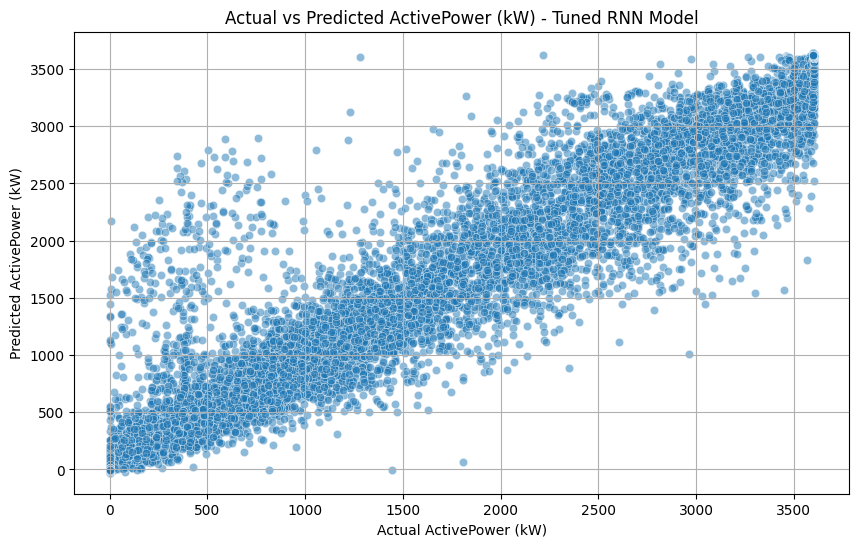

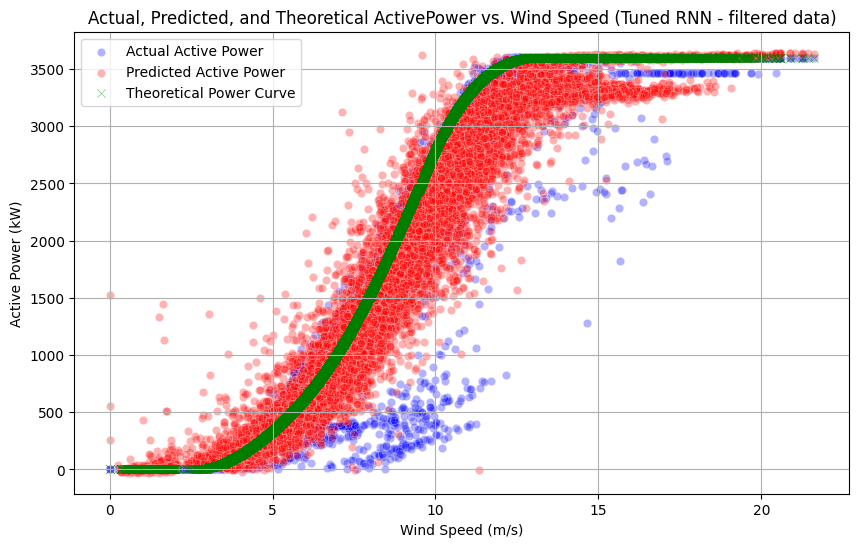

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Make predictions on the scaled test set
y_pred_scaled_rnn_tuned = rnn_model.predict(X_test_rnn_seq)

# Inverse transform the predictions to the original scale
y_pred_rnn_tuned = scaler_y_rnn.inverse_transform(y_pred_scaled_rnn_tuned).ravel()

# Inverse transform the actual test target values to the original scale
y_test_rnn_original_tuned = scaler_y_rnn.inverse_transform(y_test_rnn_seq.reshape(-1, 1)).ravel()

# Evaluate the model
mse_rnn_tuned = mean_squared_error(y_test_rnn_original_tuned, y_pred_rnn_tuned)
r2_rnn_tuned = r2_score(y_test_rnn_original_tuned, y_pred_rnn_tuned)

print(f"Mean Squared Error (MSE) for Tuned RNN: {mse_rnn_tuned}")
print(f"R-squared (R2) for Tuned RNN: {r2_rnn_tuned}")

# Visualize predicted vs actual values for the Tuned RNN model
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_rnn_original_tuned, y=y_pred_rnn_tuned, alpha=0.5)
plt.title('Actual vs Predicted ActivePower (kW) - Tuned RNN Model')
plt.xlabel('Actual ActivePower (kW)')
plt.ylabel('Predicted ActivePower (kW)')
plt.grid(True)
plt.show()

# Create a DataFrame for plotting from the test set of filtered data
plot_df_rnn_tuned = pd.DataFrame({
    'Wind Speed (m/s)': X_test_rnn['Wind Speed (m/s)'].iloc[look_back:], # Adjust for look_back
    'Actual ActivePower (kW)': y_test_rnn_original_tuned,
    'Predicted ActivePower (kW)': y_pred_rnn_tuned,
    'Theoretical_Power_Curve (KWh)': X_test_rnn['Theoretical_Power_Curve (KWh)'].iloc[look_back:]
})

plt.figure(figsize=(10, 6))

# Plot Actual Active Power
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Actual ActivePower (kW)',
    data=plot_df_rnn_tuned,
    alpha=0.3,
    label='Actual Active Power',
    color='blue'
)

# Plot Predicted Active Power
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Predicted ActivePower (kW)',
    data=plot_df_rnn_tuned,
    alpha=0.3,
    label='Predicted Active Power',
    color='red'
)

# Plot Theoretical Power Curve
sns.scatterplot(
    x='Wind Speed (m/s)',
    y='Theoretical_Power_Curve (KWh)',
    data=plot_df_rnn_tuned,
    alpha=0.5,
    label='Theoretical Power Curve',
    color='green',
    marker='x' # Use a different marker for theoretical data
)

plt.title('Actual, Predicted, and Theoretical ActivePower vs. Wind Speed (Tuned RNN - filtered data)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Active Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

## Adjust LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Get the number of features from X_train_rnn_seq
num_features = X_train_rnn_seq.shape[2]

# Initialize the Sequential model
rnn_model = Sequential()

# Add an Input layer explicitly with the updated look_back
rnn_model.add(Input(shape=(look_back, num_features)))

# Add the first LSTM layer with updated units and dropout for regularization
rnn_model.add(LSTM(units=64, activation='relu', return_sequences=True))
rnn_model.add(Dropout(0.2))

# Add a second LSTM layer with updated units and dropout
rnn_model.add(LSTM(units=64, activation='relu'))
rnn_model.add(Dropout(0.2))

# Add a Dense output layer
rnn_model.add(Dense(units=1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

print("RNN model redefined with adjusted LSTM units and Dropout layers and compiled successfully.")
rnn_model.summary()

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=10,        # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', # Monitor validation loss
    factor=0.5,         # Factor by which the learning rate will be reduced. new_lr = lr * factor
    patience=5,         # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=0.0001,      # Lower bound on the learning rate
    verbose=1
)

print("EarlyStopping and ReduceLROnPlateau callbacks defined.")

# Train the model
history_tuned_units = rnn_model.fit(
    X_train_rnn_seq,
    y_train_rnn_seq,
    epochs=100,
    batch_size=128,
    validation_data=(X_test_rnn_seq, y_test_rnn_seq),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)
print("RNN model training complete with adjusted LSTM units, early stopping and learning rate reduction.")

RNN model redefined with adjusted LSTM units and Dropout layers and compiled successfully.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 36, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 36, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,497 (197.25 KB)

 Trainable params: 50,497 (197.25 KB)

 Non-trainable params: 0 (0.00 B)

EarlyStopping and ReduceLROnPlateau callbacks defined.
Epoch 1/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - loss: 0.2772 - mean_absolute_error: 0.3804 - val_loss: 0.1023 - val_mean_absolute_error: 0.2166 - learning_rate: 0.0010
Epoch 2/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1116 - mean_absolute_error: 0.2282 - val_loss: 0.0981 - val_mean_absolute_error: 0.2088 - learning_rate: 0.0010
Epoch 3/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0956 - mean_absolute_error: 0.2109 - val_loss: 0.0915 - val_mean_absolute_error: 0.2039 - learning_rate: 0.0010
Epoch 4/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0881 - mean_absolute_error: 0.1996 - val_loss: 0.0928 - val_mean_absolute_error: 0.2050 - learning_rate: 0.0010
Epoch 5/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0840 - mean_absolute_error: 0.1936 - val_loss: 0.0923 - val_mean_absolute_error: 0.2078 - learning_rate: 0.0010
Epoch 6/100
237/237 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.


Epoch 13: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 18: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


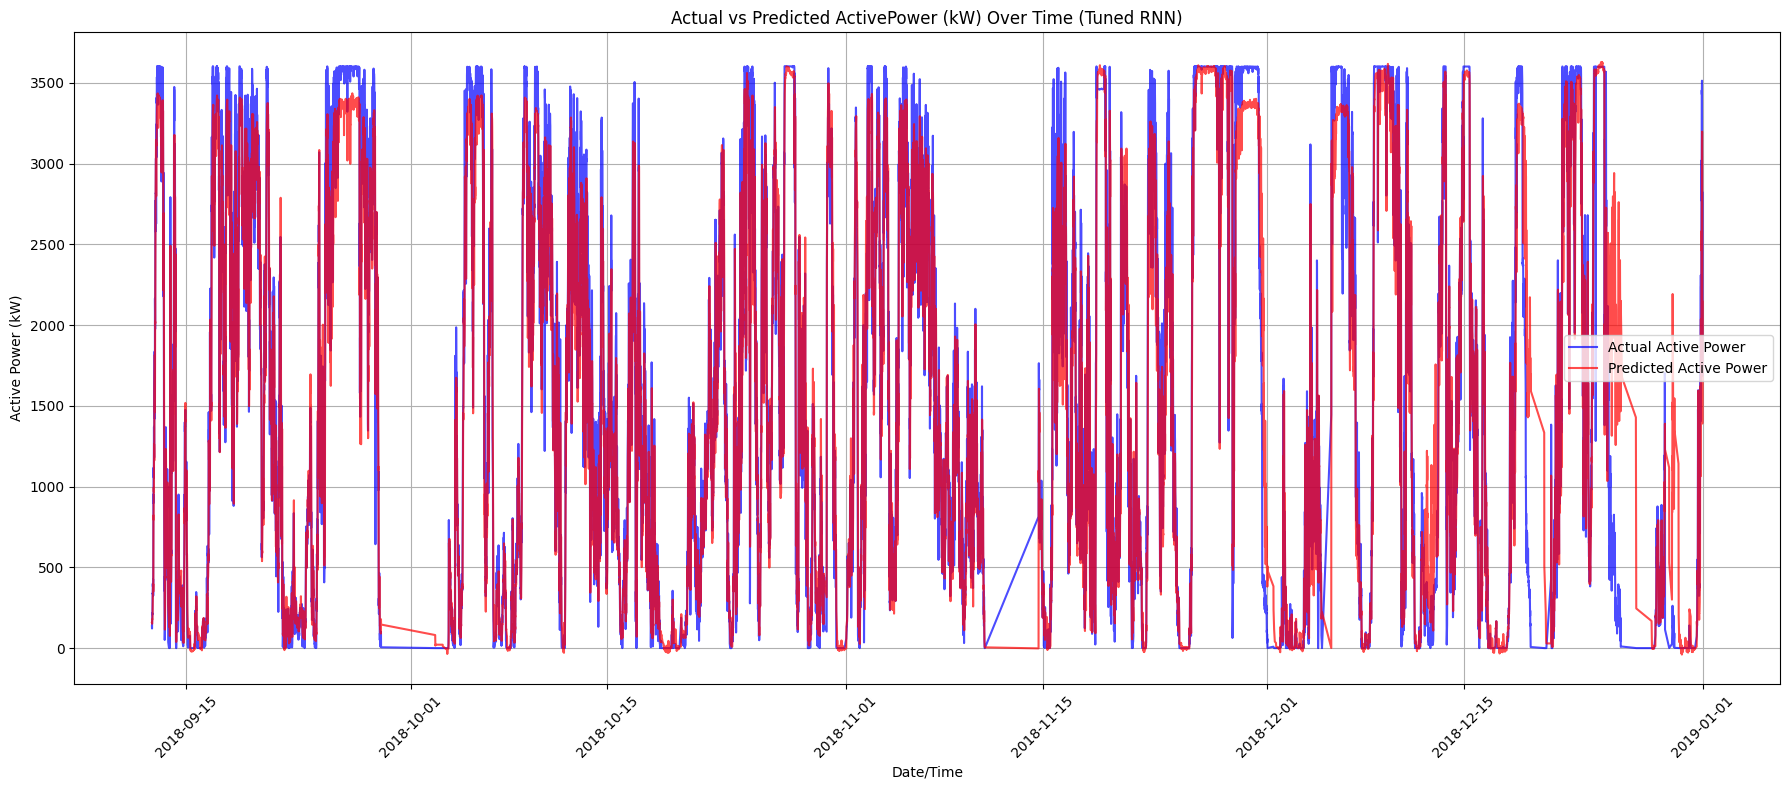

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Load Data ---
# Assuming drive is already mounted. If not, uncomment the next two lines.
# from google.colab import drive
# drive.mount('/content/drive')
csv_path = '/content/drive/MyDrive/WindProps.csv'
df = pd.read_csv(csv_path)

# --- 2. Filter Data ---
filtered_df = df[(df['LV ActivePower (kW)'] > 0) | (df['Wind Speed (m/s)'] <= 2)]

# --- 3. Sort Filtered Data for Time Series ---
filtered_df_sorted = filtered_df.copy()
filtered_df_sorted['Date/Time'] = pd.to_datetime(filtered_df_sorted['Date/Time'], format='%d %m %Y %H:%M')
filtered_df_sorted = filtered_df_sorted.sort_values(by='Date/Time').reset_index(drop=True)

# --- 4. Prepare Data for RNN (Split & Scale) ---
X_sorted = filtered_df_sorted[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y_sorted = filtered_df_sorted['LV ActivePower (kW)']
train_size = int(len(filtered_df_sorted) * 0.7)

X_train_rnn, X_test_rnn = X_sorted[0:train_size], X_sorted[train_size:len(filtered_df_sorted)]
y_train_rnn, y_test_rnn = y_sorted[0:train_size], y_sorted[train_size:len(filtered_df_sorted)]

scaler_X_rnn = StandardScaler()
scaler_y_rnn = StandardScaler()
X_train_scaled = scaler_X_rnn.fit_transform(X_train_rnn)
X_test_scaled = scaler_X_rnn.transform(X_test_rnn)
y_train_scaled = scaler_y_rnn.fit_transform(y_train_rnn.values.reshape(-1, 1)).ravel()
y_test_scaled = scaler_y_rnn.transform(y_test_rnn.values.reshape(-1, 1)).ravel()

# --- 5. Create Time-Series Sequences ---
look_back = 36 # Value from previous tuning step
def create_rnn_sequences(X_data, y_data, look_back):
    X_seq, y_seq = [], []
    for i in range(len(X_data) - look_back):
        X_seq.append(X_data[i:(i + look_back)])
        y_seq.append(y_data[i + look_back])
    return np.array(X_seq), np.array(y_seq)

X_train_rnn_seq, y_train_rnn_seq = create_rnn_sequences(X_train_scaled, y_train_scaled, look_back)
X_test_rnn_seq, y_test_rnn_seq = create_rnn_sequences(X_test_scaled, y_test_scaled, look_back)

# --- 6. Define RNN Model ---
num_features = X_train_rnn_seq.shape[2]
rnn_model = Sequential()
rnn_model.add(Input(shape=(look_back, num_features)))
rnn_model.add(LSTM(units=64, activation='relu', return_sequences=True)) # Units from previous tuning step
rnn_model.add(Dropout(0.2))
rnn_model.add(LSTM(units=64, activation='relu')) # Units from previous tuning step
rnn_model.add(Dropout(0.2))
rnn_model.add(Dense(units=1))
rnn_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# --- 7. Define Callbacks & Train Model ---
early_stopping = EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=0.0001, verbose=1)
history_tuned_units = rnn_model.fit(
    X_train_rnn_seq, y_train_rnn_seq, epochs=100, batch_size=128,
    validation_data=(X_test_rnn_seq, y_test_rnn_seq),
    callbacks=[early_stopping, reduce_lr], verbose=0 # Set verbose to 0 to avoid printing all epochs again
)

# --- 8. Make Predictions & Inverse Transform ---
y_pred_scaled_rnn_tuned = rnn_model.predict(X_test_rnn_seq)
y_pred_rnn_tuned = scaler_y_rnn.inverse_transform(y_pred_scaled_rnn_tuned).ravel()
y_test_rnn_original_tuned = scaler_y_rnn.inverse_transform(y_test_rnn_seq.reshape(-1, 1)).ravel()

# --- 9. Plot Actual vs Predicted ActivePower Over Time ---
# Get the original timestamps for the test set, adjusted for the look_back window
test_start_index = train_size + look_back # Start of test data after look_back
test_end_index = test_start_index + len(y_test_rnn_original_tuned)

time_stamps_for_plot = filtered_df_sorted['Date/Time'].iloc[test_start_index:test_end_index].reset_index(drop=True)

# Create a DataFrame for plotting
plot_df_time_series = pd.DataFrame({
    'Date/Time': time_stamps_for_plot,
    'Actual ActivePower (kW)': y_test_rnn_original_tuned,
    'Predicted ActivePower (kW)': y_pred_rnn_tuned
})

# Sort by Date/Time to ensure correct plotting order
plot_df_time_series = plot_df_time_series.sort_values(by='Date/Time').reset_index(drop=True)


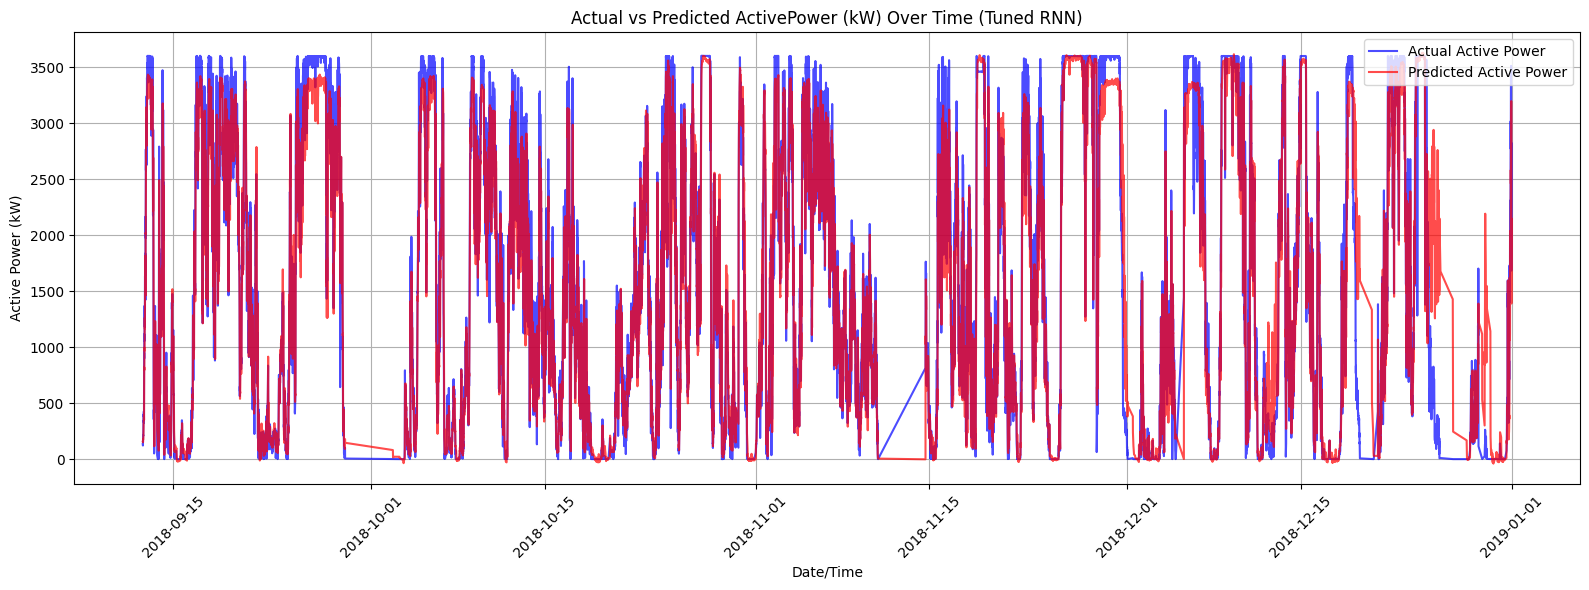

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x='Date/Time', y='Actual ActivePower (kW)', data=plot_df_time_series, label='Actual Active Power', color='blue', alpha=0.7)
sns.lineplot(x='Date/Time', y='Predicted ActivePower (kW)', data=plot_df_time_series, label='Predicted Active Power', color='red', alpha=0.7)

plt.title('Actual vs Predicted ActivePower (kW) Over Time (Tuned RNN)')
plt.xlabel('Date/Time')
plt.ylabel('Active Power (kW)')
plt.legend(loc= 'upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse_rnn_f = mean_squared_error(y_test_rnn_original_tuned, y_pred_rnn_tuned)
r2_rnn_f = r2_score(y_test_rnn_original_tuned, y_pred_rnn_tuned)

print(f"Mean Squared Error (MSE) for RNN after final tuning: {mse_rnn_f}")
print(f"R-squared (R2) for RNN after final tuning: {r2_rnn_f}")

Mean Squared Error (MSE) for RNN after final tuning: 139200.04901118705
R-squared (R2) for RNN after final tuning: 0.9152944000742154


Try removing wind speed as a feature (just use theoretical power curve and wind direction)

In [ ]:
# Separate features ( wind direction, theoretical power) from target (active power)
X_f_t = filtered_df[[ 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)']]
y_f = filtered_df['LV ActivePower (kW)']
timestamps_f = filtered_df['Date/Time']

# Split the data into training and testing sets (70-30 split)
X_train_f_t, X_test_f_t, y_train_f_t, y_test_f_t, timestamps_train_f_t, timestamps_test_f_t = train_test_split(
    X_f_t, y_f, timestamps_f, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train_f_t, y_train_f_t)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_f_t = rf_model.predict(X_test_f_t)

# Evaluate the model
mset = mean_squared_error(y_test_f_t, y_pred_f_t)
r2t = r2_score(y_test_f_t, y_pred_f_t)

print(f"Mean Squared Error (MSE): {mset}")
print(f"R-squared (R2): {r2t}")

Mean Squared Error (MSE): 68073.69214497352
R-squared (R2): 0.9598767716665011


Now try removing theoretical power curve, keeping only wind speed and direction

In [ ]:
# Separate features (wind speed, wind direction) from target (active power)
X_f_w = filtered_df[[ 'Wind Speed (m/s)', 'Wind Direction (°)']]
y_f = filtered_df['LV ActivePower (kW)']
timestamps_f = filtered_df['Date/Time']

# Split the data into training and testing sets (70-30 split)
X_train_f_w, X_test_f_w, y_train_f_w, y_test_f_w, timestamps_train_f_w, timestamps_test_f_w = train_test_split(
    X_f_w, y_f, timestamps_f, test_size=0.3, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)

# Train the model
rf_model.fit(X_train_f_w, y_train_f_w)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_f_w = rf_model.predict(X_test_f_w)

# Evaluate the model
msew = mean_squared_error(y_test_f_w, y_pred_f_w)
r2w = r2_score(y_test_f_w, y_pred_f_w)

print(f"Mean Squared Error (MSE): {msew}")
print(f"R-squared (R2): {r2w}")

Mean Squared Error (MSE): 63267.9515913806
R-squared (R2): 0.9627093170958385


## Tuning RF

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5, # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    verbose=2, # print progress
    n_jobs=-1 # use all available cores
)

grid_search.fit(X_train_f, y_train_f)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best MSE (negative): {grid_search.best_score_}") # Note: GridSearchCV outputs negative MSE

best_rf_model = grid_search.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best MSE (negative): -60441.21777377117


In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
rf_model =best_rf_model

# Train the model
rf_model.fit(X_train_f, y_train_f)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      n_jobs=-1, random_state=42)

In [8]:
# Make predictions on the test set
y_pred_f= rf_model.predict(X_test_f)

# Evaluate the model
msef = mean_squared_error(y_test_f, y_pred_f)
r2f = r2_score(y_test_f, y_pred_f)

print(f"Mean Squared Error (MSE): {msef}")
print(f"R-squared (R2): {r2f}")

Mean Squared Error (MSE): 56331.71432768033
R-squared (R2): 0.9667975958822171


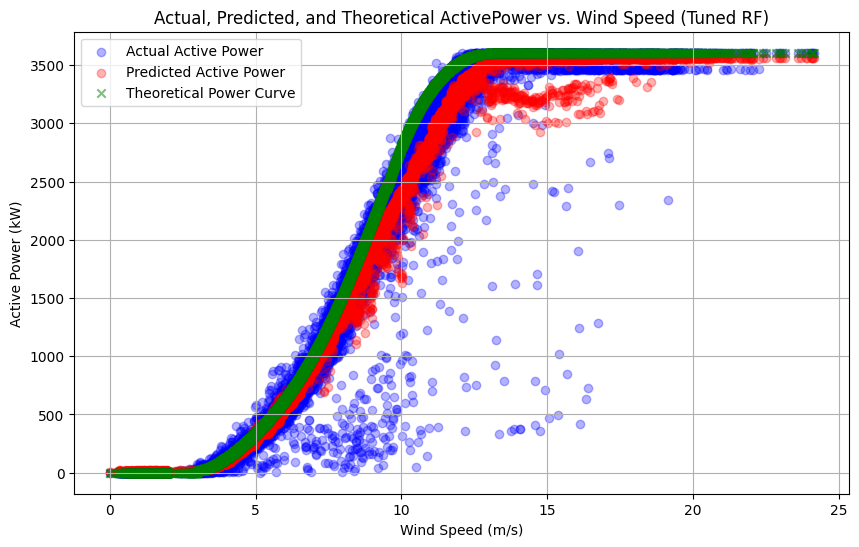

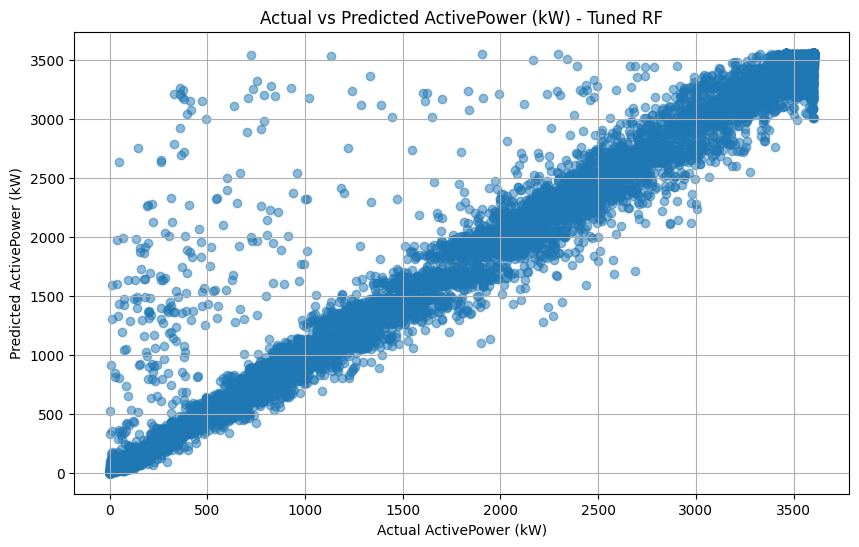

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for plotting from the test set of filtered data
plot_df = pd.DataFrame({
    'Wind Speed (m/s)': X_test_f['Wind Speed (m/s)'],
    'Actual ActivePower (kW)': y_test_f,
    'Predicted ActivePower (kW)': y_pred_f,
    'Theoretical_Power_Curve (KWh)': X_test_f['Theoretical_Power_Curve (KWh)']
})

plt.figure(figsize=(10, 6))

# Plot Actual Active Power
plt.scatter(
    x='Wind Speed (m/s)',
    y='Actual ActivePower (kW)',
    data=plot_df,
    alpha=0.3,
    label='Actual Active Power',
    color='blue'
)

# Plot Predicted Active Power
plt.scatter(
    x='Wind Speed (m/s)',
    y='Predicted ActivePower (kW)',
    data=plot_df,
    alpha=0.3,
    label='Predicted Active Power',
    color='red'
)

# Plot Theoretical Power Curve
plt.scatter(
    x='Wind Speed (m/s)',
    y='Theoretical_Power_Curve (KWh)',
    data=plot_df,
    alpha=0.5,
    label='Theoretical Power Curve',
    color='green',
    marker='x' # Use a different marker for theoretical data
)

plt.title('Actual, Predicted, and Theoretical ActivePower vs. Wind Speed (Tuned RF)')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Active Power (kW)')
plt.legend()
plt.grid(True)
plt.show()

# Visualize predicted vs actual values for the Tuned RF model
plt.figure(figsize=(10, 6))
plt.scatter(x=y_test_f, y=y_pred_f, alpha=0.5)
plt.title('Actual vs Predicted ActivePower (kW) - Tuned RF')
plt.xlabel('Actual ActivePower (kW)')
plt.ylabel('Predicted ActivePower (kW)')
plt.grid(True)
plt.show()